<img src="images/matplotlib.png" alt="drawing" width="1000"/>

# **Useful Matplotlib Plots**

This notebook contains useful matplotlib plots



In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Subplots

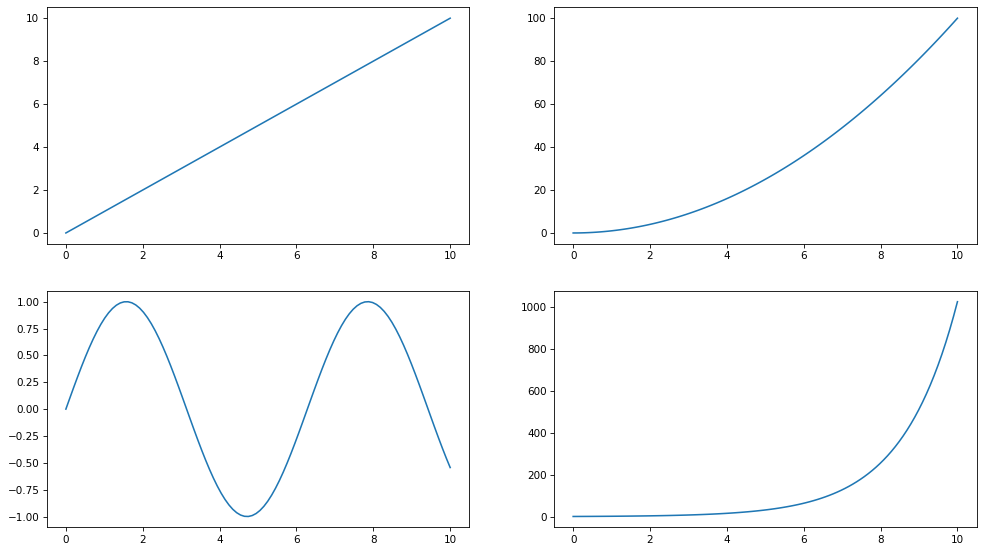

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,9), dpi=75)
ax11 = ax[0][0]
ax12 = ax[0][1]
ax21 = ax[1][0]
ax22 = ax[1][1]

x = np.linspace(0, 10, 100)

ax11.plot(x, x)
ax12.plot(x, x**2)
ax21.plot(x, np.sin(x))
ax22.plot(x, 2**x)


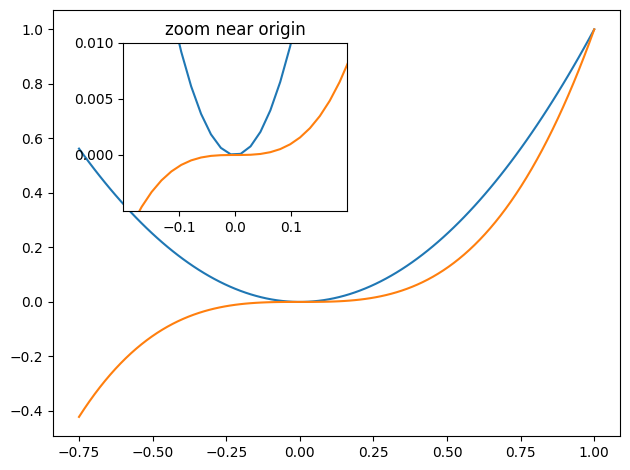

In [5]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

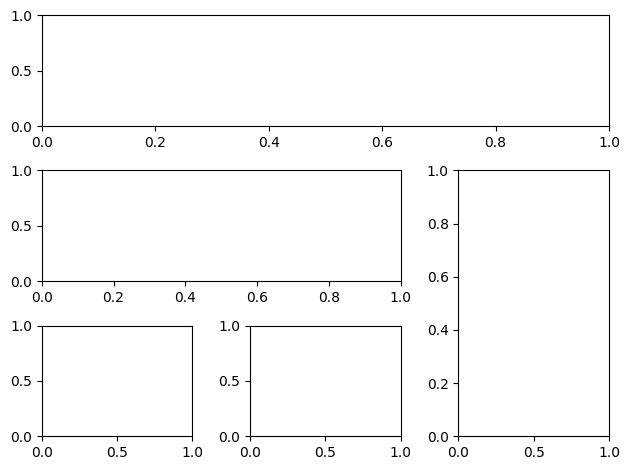

In [6]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

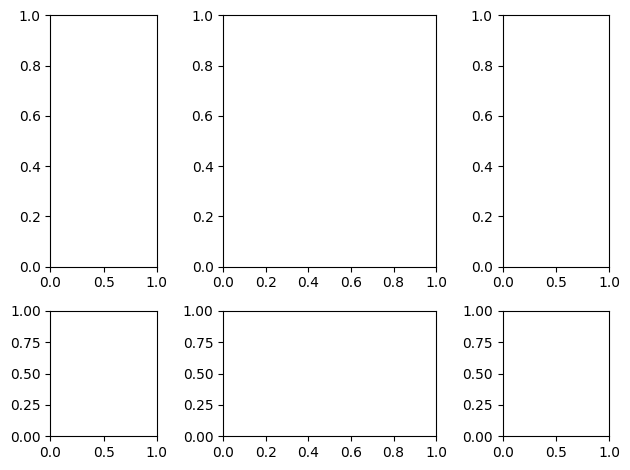

In [7]:
import matplotlib.gridspec as gridspec
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

## Styling

Text(0, 0.5, '$y$-axis')

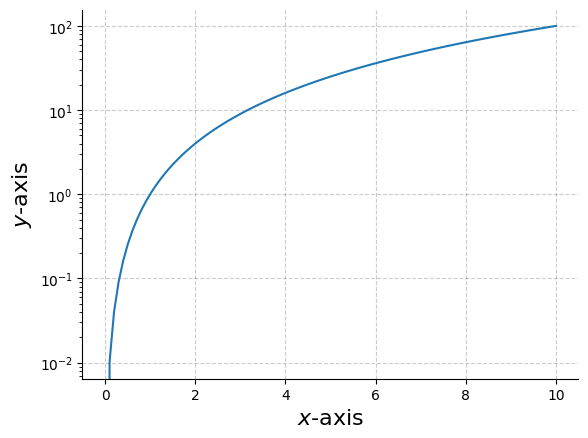

In [8]:
fig, ax = plt.subplots(1, dpi=100)

ax.grid(color='k', alpha=0.2, linestyle='dashed', linewidth=0.8)
ax.set_yscale("log")

ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

ax.plot(x, x**2)

ax.set_xlabel('$x$-axis', fontsize=16)
ax.set_ylabel('$y$-axis', fontsize=16)


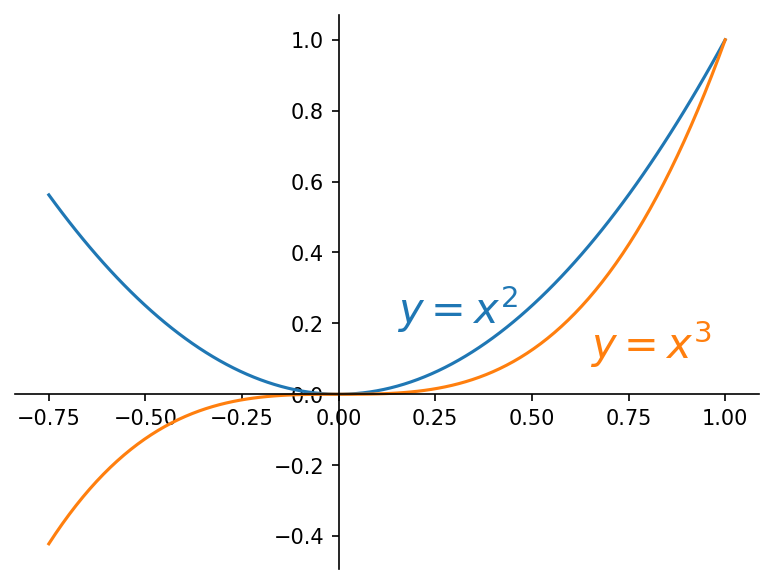

In [9]:
fig, ax = plt.subplots(dpi=150)

ax.plot(xx, xx**2, xx, xx**3)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="tab:blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="tab:orange");

## Dual Axes

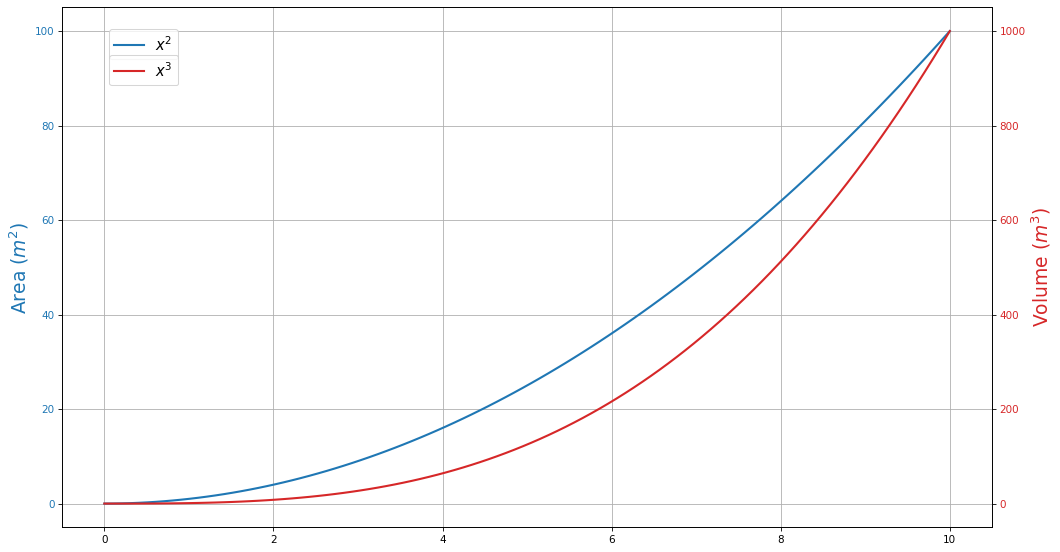

In [10]:
fig, ax1 = plt.subplots(figsize=(16,9), dpi=75)
ax2 = ax1.twinx()
ax1.grid()

ax1.plot(x, x**2, lw=2, color='tab:blue', label='$x^2$')
ax2.plot(x, x**3, lw=2, color='tab:red', label='$x^3$')

for label in ax1.get_yticklabels():
    label.set_color("tab:blue")

for label in ax2.get_yticklabels():
    label.set_color("tab:red")

ax1.set_ylabel(r"Area $(m^2)$", fontsize=18, color="tab:blue")
ax2.set_ylabel(r"Volume $(m^3)$", fontsize=18, color="tab:red")

ax1.legend(loc=(0.05,0.9), fontsize=14)
ax2.legend(loc=(0.05,0.85), fontsize=14)


## Colormap & Contour 

In [11]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

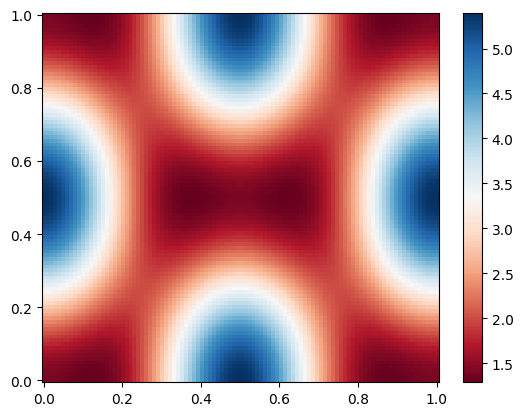

In [12]:
import matplotlib

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

### imshow

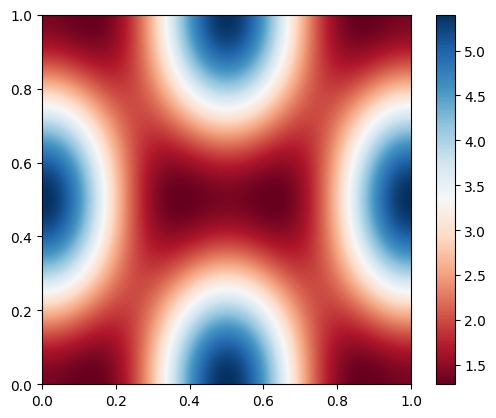

In [13]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

### Contour

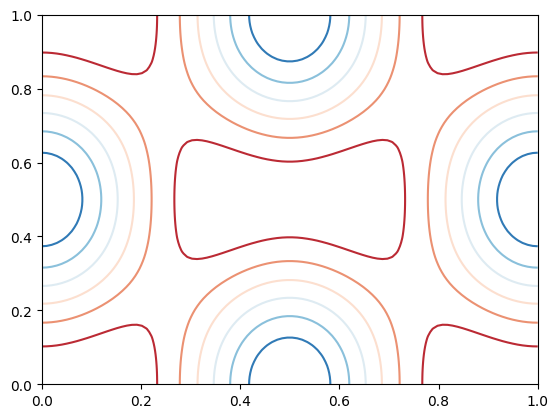

In [14]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D Plots

#### Wire-frame plot

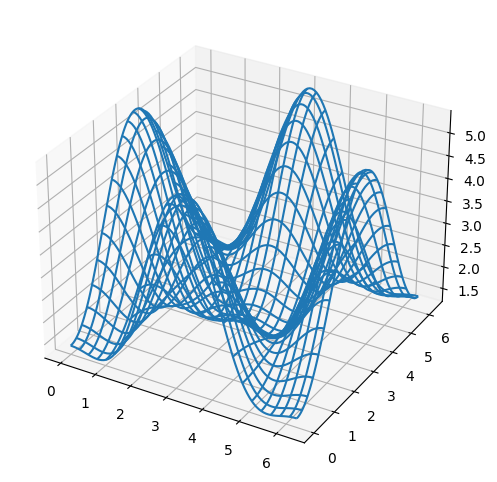

In [15]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

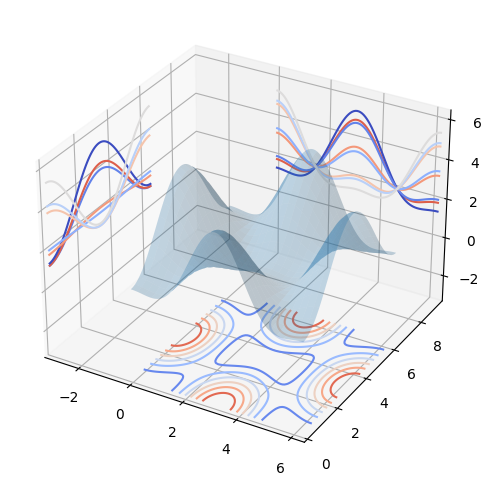

In [16]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Surface plots

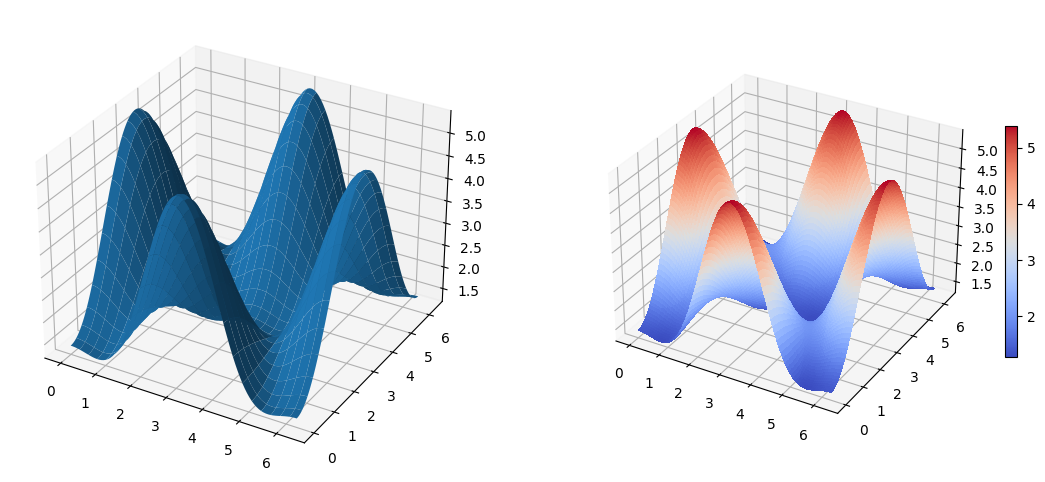

In [17]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
